In [12]:
import itertools
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from parking import *
# def is_parking_function_recursive(sequence, p, n, attempts_left, k, occupied, bc="circle"):
#     # Base case: if sequence is empty, all cars have successfully parked
#     if len(sequence) == 0:
#         return 1

#     # Base case: if all spots are occupied, all cars have successfully parked
#     if all(occupied):
#         return 1  
    
#     total_probability = 0  # Initialize the total probability of successful parking for this sequence
#     pref = sequence[0] - 1  # Convert the preferred spot to 0-based indexing (the first spot is index 0 etc...)
    
#     if occupied[pref]:  # If the desired spot is already occupied
#         if attempts_left == 0:
#             return 0  # No attempts left, so return 0 as parking failed
#         else:
#             if bc == "circle":
#                 # Move left or right in the circle
#                 if sequence[0] == 1:
#                     new_sequence_left = (n,) + sequence[1:]  # Wrap around to the end of the parking lot
#                 else:
#                     new_sequence_left = (sequence[0] - 1,) + sequence[1:]
#                 if sequence[0] == n:
#                     new_sequence_right = (1,) + sequence[1:]
#                 else:
#                     new_sequence_right = (sequence[0] + 1,) + sequence[1:]
#                 # Recursively calculate the probability of successful parking for both left and right movements
#                 total_probability += p * is_parking_function_recursive(new_sequence_right, p, n, attempts_left - 1, k, tuple(occupied), bc)
#                 total_probability += (1 - p) * is_parking_function_recursive(new_sequence_left, p, n, attempts_left - 1, k, tuple(occupied), bc)
#             elif bc == "sticky":
#                 # Move left or right with sticky boundary condition
#                 if sequence[0] == 1:
#                     new_sequence_left = sequence  # Stay in the same spot
#                 else:
#                     new_sequence_left = (sequence[0] - 1,) + sequence[1:]
#                 if sequence[0] == n:
#                     new_sequence_right = sequence  # Stay in the same spot
#                 else:
#                     new_sequence_right = (sequence[0] + 1,) + sequence[1:]
#                 # Recursively calculate the probability of successful parking for both left and right movements
#                 total_probability += p * is_parking_function_recursive(new_sequence_right, p, n, attempts_left - 1, k, tuple(occupied), bc)
#                 total_probability += (1 - p) * is_parking_function_recursive(new_sequence_left, p, n, attempts_left - 1, k, tuple(occupied), bc)
#             elif bc == "leave and don't come back":
#                 # Move left or right with "leave and don't come back" boundary condition
#                 if sequence[0] == 1:
#                     new_sequence_left = None  # Moving left from leftmost spot gives 0 probability
#                 else:
#                     new_sequence_left = (sequence[0] - 1,) + sequence[1:]
#                 if sequence[0] == n:
#                     new_sequence_right = None  # Moving right from rightmost spot gives 0 probability
#                 else:
#                     new_sequence_right = (sequence[0] + 1,) + sequence[1:]
#                 # Recursively calculate the probability of successful parking for both left and right movements
#                 if new_sequence_right is not None:
#                     total_probability += p * is_parking_function_recursive(new_sequence_right, p, n, attempts_left - 1, k, tuple(occupied), bc)
#                 if new_sequence_left is not None:
#                     total_probability += (1 - p) * is_parking_function_recursive(new_sequence_left, p, n, attempts_left - 1, k, tuple(occupied), bc)
#     else:  # If the preferred spot is free
#         new_occupied = list(occupied)  # Make a copy of the occupied list to update it
#         new_occupied[pref] = True  # Mark the preferred spot as occupied
#         remaining_sequence = sequence[1:]  # Remove the first car from the sequence
        
#         # Recursively calculate the probability of successful parking for the remaining sequence
#         total_probability += is_parking_function_recursive(tuple(remaining_sequence), p, n, k, k, tuple(new_occupied), bc)
        
#     return total_probability  # Return the total probability of successful parking for this sequence


In [13]:
# Define the boundary condition to use
boundary_condition = "leave and don't come back"

# Initialize a matrix to store the results
results = []

# Define a symbolic variable for the probability
x = symbols('x')

# Iterate over all n and k values less than 6
for n in range(1, 6):
    row = []
    for k in range(1, 6):
        sequences = itertools.product(range(1, n + 1), repeat=n)  # Generate all sequences in [n]^n
        total_sum = 0  # Initialize the sum of probabilities
        
        for seq in sequences:
            prob = is_parking_function_recursive(seq, x, n, k, k, [False] * n, boundary_condition)
            total_sum += prob  # Sum the probabilities of all sequences
        
        expanded_expr = expand(total_sum)  # Expand and simplify the expression
        row.append(expanded_expr)  # Store the expanded expression in the row
    
    results.append(row)  # Store the row in the results matrix

# Convert results to a sympy Matrix for better display
results_matrix = Matrix(results)

# Print the results matrix
print("Parking success polynomials for each (n, k) with 'leave and don't come back' boundary condition:")
for row in results_matrix.tolist():
    for elem in row:
        print(elem, end="\t")
    print()

# Optional: Print the LaTeX representation of the matrix
latex_matrix = latex(results_matrix)
print(f"The LaTeX representation of the matrix is: \n{latex_matrix}")

KeyboardInterrupt: 

Sum of parking success probabilities for each (k, n) with sticky boundary condition and p=1/2:
1	3.969	23.14	171	1565	1.718e+04	
1	3.938	22.13	159.1	1423	1.528e+04	
1	3.875	20.79	144.1	1248	1.299e+04	
1	3.75	19	126.7	1058	1.06e+04	
1	3.5	16.38	102.8	806.1	7587	
1	3	13	75	541	4683	


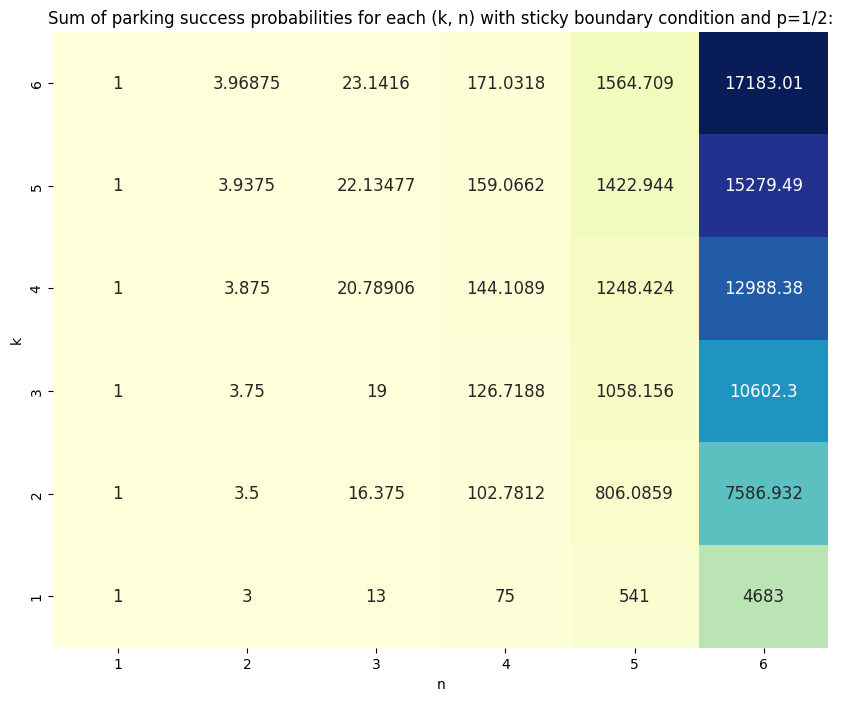

In [11]:
#make a nice plot for p=1/2 for all k,n paris with k,n less than x
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the boundary condition to use
#boundary_condition = "leave and don't come back"
#boundary_condition = "circle"
boundary_condition = "sticky"

# Initialize a matrix to store the results
results = []
x=7
# Iterate over all k and n values less than x
for k in range(1, x):
    row = []
    for n in range(1, x):
        sequences = itertools.product(range(1, n + 1), repeat=n)  # Generate all sequences in [n]^n
        total_sum = 0  # Initialize the sum of probabilities
        
        for seq in sequences:
            prob = is_parking_function_recursive(seq, 1/2, n, k, k, [False] * n, boundary_condition)
            total_sum += prob  # Sum the probabilities of all sequences
        row.append(total_sum)  # Store the total sum of probabilities in the row
    
    results.append(row)  # Store the row in the results matrix

# Print the results matrix with better formatting
results_matrix = np.array(results)

# Flip the results matrix vertically to have k increasing up the y-axis
results_matrix_flipped = np.flipud(results_matrix)

title = f"Sum of parking success probabilities for each (k, n) with {boundary_condition} boundary condition and p=1/2:"
# Print the results matrix with better formatting
print(title)
for row in results_matrix_flipped:
    for elem in row:
        print(f"{elem:.4g}", end="\t")  # Use .4g for compact formatting
    print()

# Function to format the heatmap annotations
def format_func(x):
    return f"{x:.7g}"  # Use .4g for compact formatting

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(results_matrix_flipped, annot=True, fmt="", cmap="YlGnBu", xticklabels=range(1, x), yticklabels=range(x - 1, 0, -1), cbar=False, annot_kws={"size": 12})

# Manually adjust the annotations
for text in plt.gca().texts:
    text.set_text(format_func(float(text.get_text())))

plt.xlabel('n')
plt.ylabel('k')
plt.title(title)
plt.show()

In [15]:
# Example usage: Finding the polynomial for a single n,k pair
n = 3  # Number of parking spots
k = 5  # Number of attempts allowed to park
sequences = itertools.product(range(1, n + 1), repeat=n)  # Generate all sequences in [n]^n==potential PFs
probabilities = {}  # Dictionary to store the success probabilities for each sequence

for seq in sequences:
    prob = is_parking_function_recursive(seq, x, n, k, k, [False] * n, "leave and don't come back")  
    # The last parameter is the BC, options are leave and don't come back, circle, and sticky 
    probabilities[seq] = prob

sum_prob = 0  # Initialize the sum of probabilities
print(f"Parking success probabilities in [{n}]^{n} with k={k}")
for seq, prob in probabilities.items():
    sum_prob += prob  # Sum the probabilities of all sequences

# Print the sum of the probabilities that each parking function parks
print(f"The sum of the probabilities that each parking function parks is {sum_prob}")

# Expand and simplify the expression
expanded_expr = expand(sum_prob)
print(f"Which simplifies to {expanded_expr}")

# Convert the simplified expression to LaTeX
latex_expr = latex(expanded_expr)
print(f"The LaTeX representation is: {latex_expr}")

Parking success probabilities in [3]^3 with k=5
The sum of the probabilities that each parking function parks is x**2*(x**2*(1 - x) + x) + 3*x*(1 - x)*(x**2*(1 - x) + x) + 3*x*(1 - x)*(x*(1 - x)**2 - x + 1) + 2*x*(x**2*(1 - x) + x) + x*(x*(1 - x)*(x**2*(1 - x) + x) + x) + x*(x*(1 - x)*(x*(1 - x)**2 - x + 1) - x + 1) + (1 - x)**2*(x*(1 - x)**2 - x + 1) + (1 - x)*(x*(1 - x)*(x**2*(1 - x) + x) + x) + 2*(1 - x)*(x*(1 - x)**2 - x + 1) + (1 - x)*(x*(1 - x)*(x*(1 - x)**2 - x + 1) - x + 1) + 12
Which simplifies to -3*x**4 + 6*x**3 - 3*x**2 + 16
The LaTeX representation is: - 3 x^{4} + 6 x^{3} - 3 x^{2} + 16
